Veri kümesindeki toplam tweet sayısı: 1.6 Milyon
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1600000 non-null  int64 
 1   Id         1600000 non-null  int64 
 2   Date       1600000 non-null  object
 3   Flag       1600000 non-null  object
 4   User       1600000 non-null  object
 5   Tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


<ipython-input-4-787af446541a>:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


İlk tweet:  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
İkinci tweet:  is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!


Text(0.5, 1.0, 'Negatif Tweetler - Kelime Bulutu')

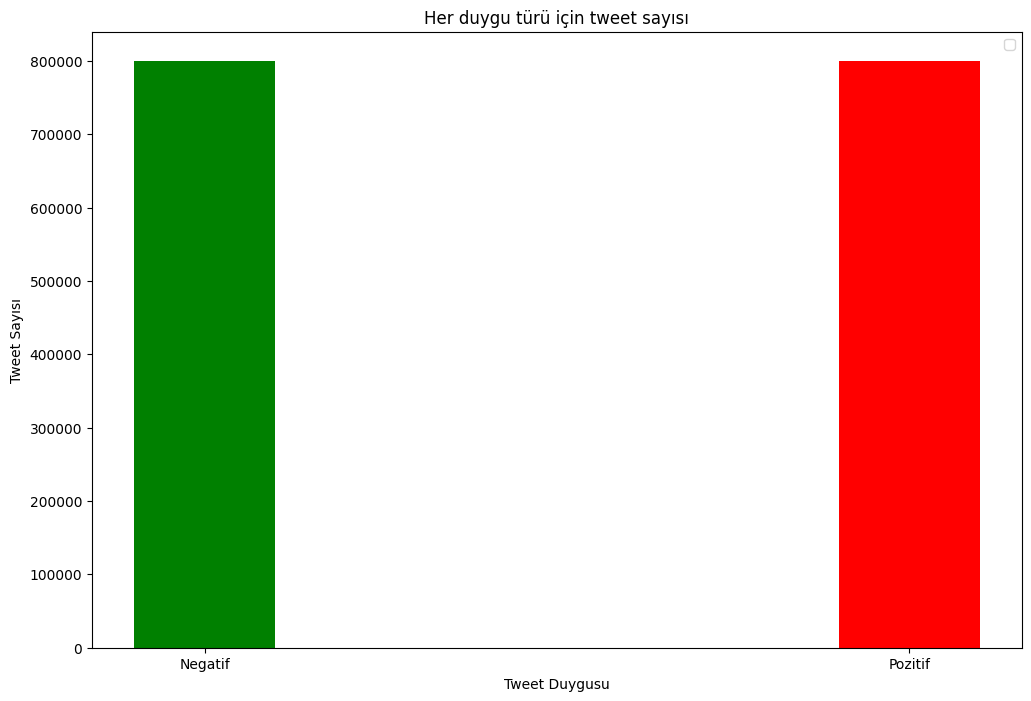

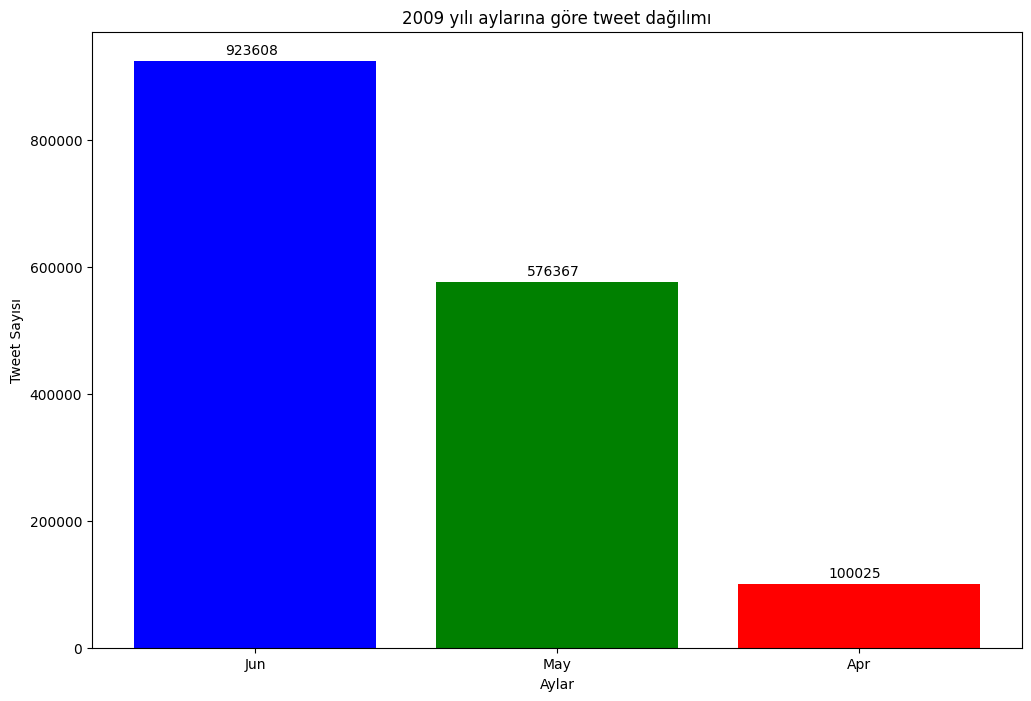

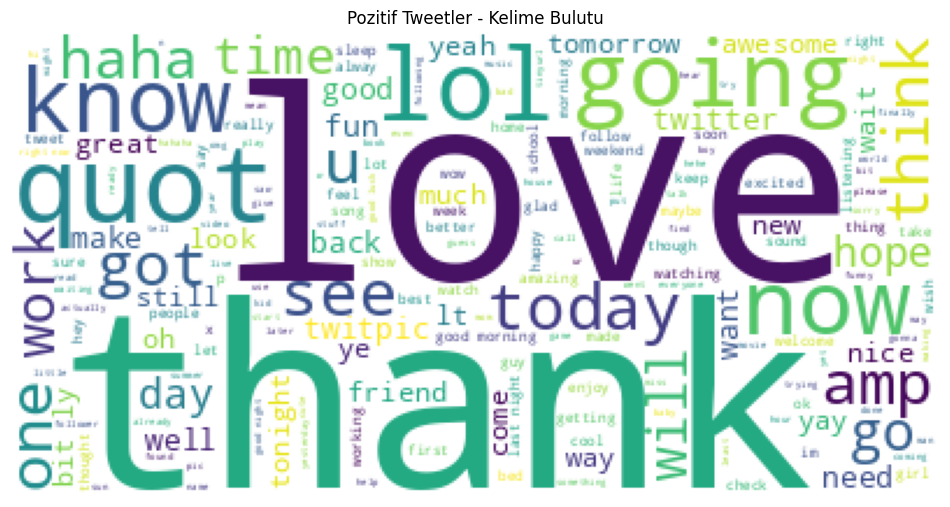

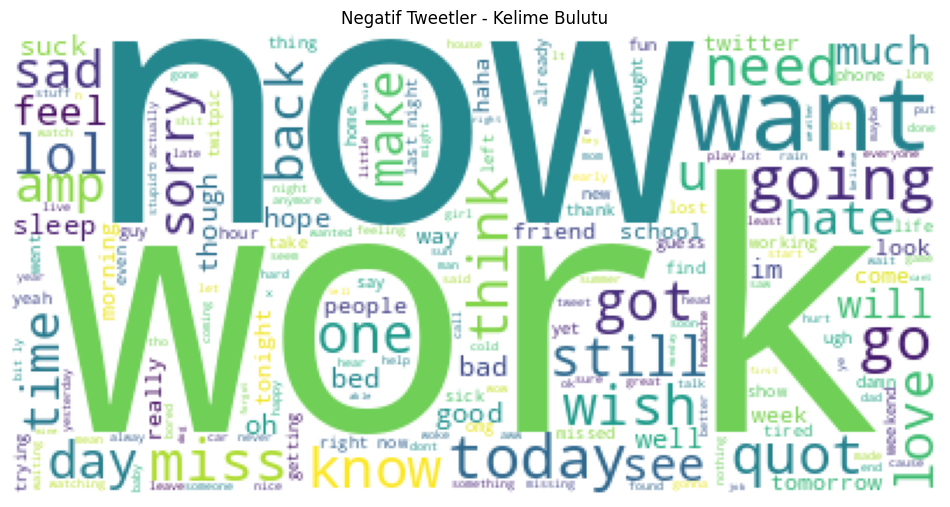

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Veri kümesi
dataset = pd.read_csv('dataset.csv', names = ['Sentiment', 'Id', 'Date', 'Flag', 'User', 'Tweet'], encoding='latin1')


# Toplamda 6 sütundan oluşan veri kümesinde yaklaşık 1.6 milyon tweet bulunduğu doğrulanmıştır.
print("Veri kümesindeki toplam tweet sayısı: {} Milyon".format(dataset.shape[0]/1000000.0))

# Sütun tipleri ve eksik veri durumu `info()` metodu ile analiz edilmiştir.
dataset.info()


## Column analysis
# Sütunlar analiz edilmiştir.

### Sentiment
# Sentiment (duygu) sütunundaki dağılım incelenmiştir.

# Pozitif ve negatif tweet’lerin sayıları `value_counts()` ile sayılmıştır.
class_count = dataset['Sentiment'].value_counts()  # Sıralı şekilde [4, 0]

# Pozitif ve negatif duygu durumlarının dağılımı çubuk grafik ile görselleştirilmiştir.
plt.figure(figsize = (12, 8))
plt.xticks([4, 0], ['Pozitif', 'Negatif'])
plt.bar(x = class_count.keys(),
        height = class_count.values,
        color = ['g', 'r'])
plt.xlabel("Tweet Duygusu")
plt.ylabel("Tweet Sayısı")
plt.title("Her duygu türü için tweet sayısı")
plt.legend()

# Verinin pozitif (4) ve negatif (0) tweet’ler açısından dengeli olduğu gözlemlenmiştir.


### Date
# Tarih bilgisi kullanılarak aylara göre tweet dağılımı analiz edilmiştir.

# Ay bilgisi `Date` sütunundan ayrıştırılmıştır.
dataset['Month'] = dataset['Date'].apply(lambda date: date.split(' ')[1])
months_count = dataset['Month'].value_counts()

# Aylara göre tweet sayısı çubuk grafik ile görselleştirilmiştir.
plt.figure(figsize = (12, 8))
plt.bar(['Jun', 'May', 'Apr'], months_count.values, color = ['b', 'g', 'r'])
for i, v in enumerate(months_count.values):
    plt.text(i - 0.1, v + 10000, str(v))
plt.xlabel('Aylar')
plt.ylabel('Tweet Sayısı')
plt.title('2009 yılı aylarına göre tweet dağılımı')

# En fazla tweet’in Haziran 2009’da atıldığı tespit edilmiştir.


### Id, Flag and User
# `Id`, `Flag` ve `User` sütunlarının duygu analizi için faydasız olduğu değerlendirilmiş ve bu sütunlar kullanılmayacaktır.


### Tweet
# Tweet içeriği incelenmiştir.

# İlk iki tweet örnek olarak yazdırılmıştır.
print("İlk tweet: ", dataset['Tweet'][0])
print("İkinci tweet: ", dataset['Tweet'][1])

# Tweet’lerde kullanıcı adları, bağlantılar, emojiler ve özel karakterlerin bulunduğu gözlemlenmiştir.

# Pozitif ve negatif tweet’ler birleştirilerek iki ayrı kelime bulutu (WordCloud) oluşturulmuştur.
positive_tweets = ' '.join(dataset[dataset['Sentiment'] == 4]['Tweet'].str.lower())
negative_tweets = ' '.join(dataset[dataset['Sentiment'] == 0]['Tweet'].str.lower())

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(positive_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Pozitif Tweetler - Kelime Bulutu")

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(negative_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negatif Tweetler - Kelime Bulutu")

# Kelime bulutlarından, pozitif ve negatif tweet’lerde geçen kelimelerin oldukça benzer olduğu görülmüştür.
# Bu nedenle, benzer ifadeler içerse de doğru sınıflama yapabilecek güçlü bir sinir ağına ihtiyaç duyulduğu sonucuna varılmıştır.

## Notebook Açıklaması

1. **Kütüphanelerin İçe Aktarılması**  
   - `pandas`: Veri okuma, işleme ve çerçeve (DataFrame) yapıları için.  
   - `sklearn.model_selection.train_test_split`: Veriyi eğitim ve test kümelerine ayırmak için. (%80-%20)

2. **Sütunların Tanımlanması**  
   ```python
   COLUMNS = ['Sentiment', 'Id', 'Date', 'Flag', 'User', 'Tweet']


In [ ]:
import pandas as pd
from termcolor import colored
from sklearn.model_selection import train_test_split

# Define variables
COLUMNS = ['Sentiment', 'Id', 'Date', 'Flag', 'User', 'Tweet']

# Read dataset
dataset = pd.read_csv('dataset.csv', names = COLUMNS, encoding = 'latin-1')
print(colored("Columns: {}".format(', '.join(COLUMNS)), "yellow"))

# Remove extra columns
print(colored("Useful columns: Sentiment and Tweet", "yellow"))
print(colored("Removing other columns", "red"))
dataset.drop(['Id', 'Date', 'Flag', 'User'], axis = 1, inplace = True)
print(colored("Columns removed", "red"))

# Train test split
print(colored("Splitting train and test dataset into 80:20", "yellow"))
X_train, X_test, y_train, y_test = train_test_split(dataset['Tweet'], dataset['Sentiment'], test_size = 0.20, random_state = 100)
train_dataset = pd.DataFrame({
	'Tweet': X_train,
	'Sentiment': y_train
	})
print(colored("Train data distribution:", "yellow"))
print(train_dataset['Sentiment'].value_counts())
test_dataset = pd.DataFrame({
	'Tweet': X_test,
	'Sentiment': y_test
	})
print(colored("Test data distribution:", "yellow"))
print(test_dataset['Sentiment'].value_counts())
print(colored("Split complete", "yellow"))

# Save train data
print(colored("Saving train data", "yellow"))

train_dataset.to_csv('train.csv', index = False)
print(colored("Train data saved to train.csv", "green"))

# Save test data
print(colored("Saving test data", "yellow"))
test_dataset.to_csv('test.csv', index = False)
print(colored("Test data saved to test.csv", "green"))

Columns: Sentiment, Id, Date, Flag, User, Tweet
Useful columns: Sentiment and Tweet
Removing other columns
Columns removed
Splitting train and test dataset into 80:20
Train data distribution:
Sentiment
4    640434
0    639566
Name: count, dtype: int64
Test data distribution:
Sentiment
0    160434
4    159566
Name: count, dtype: int64
Split complete
Saving train data
Train data saved to train.csv
Saving test data
Test data saved to test.csv




1. **Gerekli Kütüphanelerin İçe Aktarılması**  
   - `re`, `nltk`, `numpy`: Metin işleme, doğal dil araçları ve sayısal işlemler için.  
   - `PorterStemmer`, `WordNetLemmatizer`: Kök indirgeme ve lemmatizasyon için.

2. **NLTK Kaynaklarının İndirilmesi**  
   ```python
   nltk.download('wordnet')
   nltk.download('stopwords')


##### Modelde kullanılmayacak sütunlar kaldırıldı
##### Stopwordler kaldırıldı
##### not gibi ifadeler için olumsuzluk genişletmesi yapıldı (don't -> do not)
##### İsimler, özel karakter, nicknameler, URL adresleri, tek karakterli tokenlar kaldırıldı
##### Lemmatization ile WordNet kullanarak kök halleri anlamlı hale getirildi
##### Stemming ile çeşitli sondan ekler kaldırıldı, sözcükler kök haline doğru indirgendi




In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from termcolor import colored
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Import datasets
print("Loading data")
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Setting stopwords
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.remove("not")

# Function to expand tweet
def expand_tweet(tweet):
	expanded_tweet = []
	for word in tweet:
		if re.search("n't", word):
			expanded_tweet.append(word.split("n't")[0])
			expanded_tweet.append("not")
		else:
			expanded_tweet.append(word)
	return expanded_tweet

# Function to process tweets
def clean_tweet(data, wordNetLemmatizer, porterStemmer):
	data['Clean_tweet'] = data['Tweet']
	print(colored("Removing user handles starting with @", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].str.replace("@[\w]*","")
	print(colored("Removing numbers and special characters", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].str.replace("[^a-zA-Z' ]","")
	print(colored("Removing urls", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].replace(re.compile(r"((www\.[^\s]+)|(https?://[^\s]+))"), "")
	print(colored("Removing single characters", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].replace(re.compile(r"(^| ).( |$)"), " ")
	print(colored("Tokenizing", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].str.split()
	print(colored("Removing stopwords", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: [word for word in tweet if word not in STOPWORDS])
	print(colored("Expanding not words", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: expand_tweet(tweet))
	print(colored("Lemmatizing the words", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: [wordNetLemmatizer.lemmatize(word) for word in tweet])
	print(colored("Stemming the words", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: [porterStemmer.stem(word) for word in tweet])
	print(colored("Combining words back to tweets", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: ' '.join(tweet))
	return data

# Define processing methods
wordNetLemmatizer = WordNetLemmatizer()
porterStemmer = PorterStemmer()

# Pre-processing the tweets
print(colored("Processing train data", "green"))
train_data = clean_tweet(train_data, wordNetLemmatizer, porterStemmer)
train_data.to_csv('clean_train.csv', index = False)
print(colored("Train data processed and saved to clean_train.csv", "green"))
print(colored("Processing test data", "green"))
test_data = clean_tweet(test_data, wordNetLemmatizer, porterStemmer)
test_data.to_csv('clean_test.csv', index = False)
print(colored("Test data processed and saved to clean_test.csv", "green"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Loading data
Processing train data
Removing user handles starting with @
Removing numbers and special characters
Removing urls
Removing single characters
Tokenizing
Removing stopwords
Expanding not words
Lemmatizing the words
Stemming the words
Combining words back to tweets
Train data processed and saved to clean_train.csv
Processing test data
Removing user handles starting with @
Removing numbers and special characters
Removing urls
Removing single characters
Tokenizing
Removing stopwords
Expanding not words
Lemmatizing the words
Stemming the words
Combining words back to tweets
Test data processed and saved to clean_test.csv


In [ ]:
!pip install wordcloud

## Model Eğitimi Pipeline

 - Aşağıda DistilBERT tabanlı sınıflandırma modelini oluşturulmuştur.
 - Temizlenmiş tweetlerden %8'i kullanıldı.
 - DistilBERT tokenizasyon işlemi yapıldı.
 - Transfer Learning yapılarak DistilBERT modeli kullanıldı.
 (TFDistilBertForSequenceClassification)



In [ ]:
import os
import tensorflow as tf
from termcolor import colored
from tensorflow.keras import mixed_precision

# Transformers (DistilBERT versiyonu)
from transformers import (
    DistilBertTokenizerFast,
    TFDistilBertForSequenceClassification,
    create_optimizer
)

# --- 0) Mixed-Precision Etkinleştir ---
mixed_precision.set_global_policy('mixed_float16')

# --- 1) VERİ YÜKLE & ÖN İŞLEME ---
print(colored("Veriyi yükleyip ön işleme hazırlıyorum...", "yellow"))
full_train = pd.read_csv('clean_train.csv')

train_data = (
    full_train
    .groupby('Sentiment', group_keys=False)
    .sample(frac=0.08, random_state=123)
    .reset_index(drop=True)
)
train_data = train_data.sample(frac=1.0, random_state=42).reset_index(drop=True)
train_data['Clean_tweet'] = train_data['Clean_tweet'].fillna('').astype(str)

# --- 2) TRAIN/VAL SPLIT (stratify) ---
print(colored("Stratified train/validation split oluşturuyorum...", "yellow"))
X_train_texts, X_val_texts, y_train, y_val = train_test_split(
    train_data['Clean_tweet'].tolist(),
    pd.get_dummies(train_data['Sentiment']).values,
    test_size=0.2,
    random_state=42,
    stratify=pd.get_dummies(train_data['Sentiment']).values
)
num_classes = y_train.shape[1]

# --- 3) TOKENİZASYON (DistilBERT) ---
print(colored("DistilBERT tokenizer ile tokenleştime ve padding...", "yellow"))
MODEL_NAME = 'dbmdz/distilbert-base-turkish-cased'
tokenizer  = DistilBertTokenizerFast.from_pretrained(MODEL_NAME)

max_len = 32   # Daha da kısıtlı sekans

train_encodings = tokenizer(
    X_train_texts,
    truncation=True,
    padding='max_length',
    max_length=max_len,
    return_tensors='tf'
)
val_encodings = tokenizer(
    X_val_texts,
    truncation=True,
    padding='max_length',
    max_length=max_len,
    return_tensors='tf'
)

# --- 4) TF.DATA DATASET HAZIRLA ---
print(colored("TF.data dataset oluşturuyorum...", "yellow"))
batch_size = 64  # Daha büyük batch ile daha az adım

train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids':      train_encodings['input_ids'],
        'attention_mask': train_encodings['attention_mask']
    },
    y_train
)).shuffle(1000).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((
    {
        'input_ids':      val_encodings['input_ids'],
        'attention_mask': val_encodings['attention_mask']
    },
    y_val
)).batch(batch_size)

# --- 5) DistilBERT-BASED SINIFLANDIRMA MODELİ ---
print(colored("DistilBERT tabanlı sınıflandırma modelini yüklüyorum...", "yellow"))
model = TFDistilBertForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=num_classes
)

# DistilBERT gövdesini dondur
for layer in model.distilbert.transformer.layer:
    layer.trainable = False

# --- 6) DERLEYİCİ & OPTİMİZER ---
print(colored("Modeli compile ediyorum...", "yellow"))
steps_per_epoch = len(train_dataset)
num_train_steps = steps_per_epoch * 2  # 2 epoch planladık

optimizer, schedule = create_optimizer(
    init_lr=3e-5,
    num_warmup_steps=0,
    num_train_steps=num_train_steps
)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Veriyi yükleyip ön işleme hazırlıyorum...
Stratified train/validation split oluşturuyorum...
DistilBERT tokenizer ile tokenleştime ve padding...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/251k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/410 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


TF.data dataset oluşturuyorum...
DistilBERT tabanlı sınıflandırma modelini yüklüyorum...


model.safetensors:   0%|          | 0.00/273M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Modeli compile ediyorum...
Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  67497984  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_19 (Dropout)        multiple                  0 (unused)
                                                                 
Total params: 68090114 (259.74 MB)
Trainable params: 25562882 (97.51 MB)
Non-trainable params: 42527232 (162.23 MB)
_________________________________________________________________


In [ ]:
# --- 7) EĞİTİM ---
print(colored("Eğitimi başlatıyorum...", "green"))
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=3,      # Kritik: sadece 3 epoch
    verbose=1
)
print(colored("Eğitim tamamlandı.", "green"))

Eğitimi başlatıyorum...
Epoch 1/3
1280/1280 [==============================] - 10486s 8s/step - loss: 0.7045 - accuracy: 0.5159 - val_loss: 0.6866 - val_accuracy: 0.5336
Epoch 2/3
1280/1280 [==============================] - 10247s 8s/step - loss: 0.6846 - accuracy: 0.5458 - val_loss: 0.6790 - val_accuracy: 0.5576
Epoch 3/3
1280/1280 [==============================] - 10191s 8s/step - loss: 0.6819 - accuracy: 0.5526 - val_loss: 0.6790 - val_accuracy: 0.5576
Eğitim tamamlandı.


In [ ]:
model.save('bert_model_tf', save_format='tf')
print(colored("Model saved in TensorFlow SavedModel format to 'bert_model_tf'", "green"))


Model saved in TensorFlow SavedModel format to 'bert_model_tf'


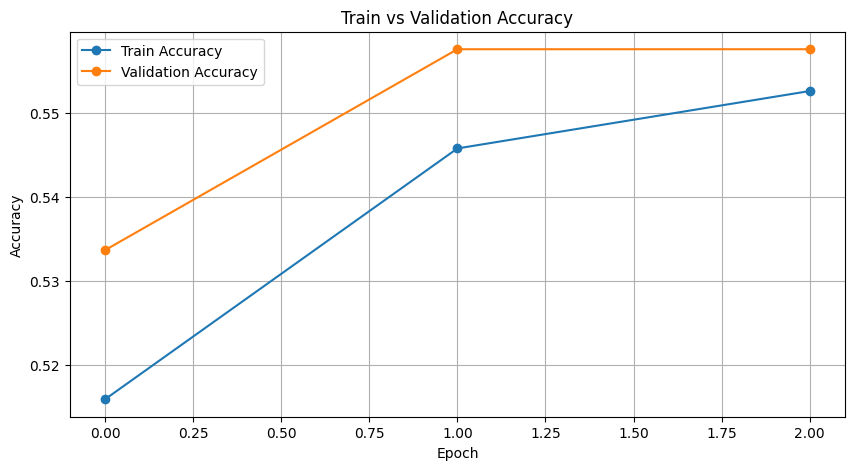

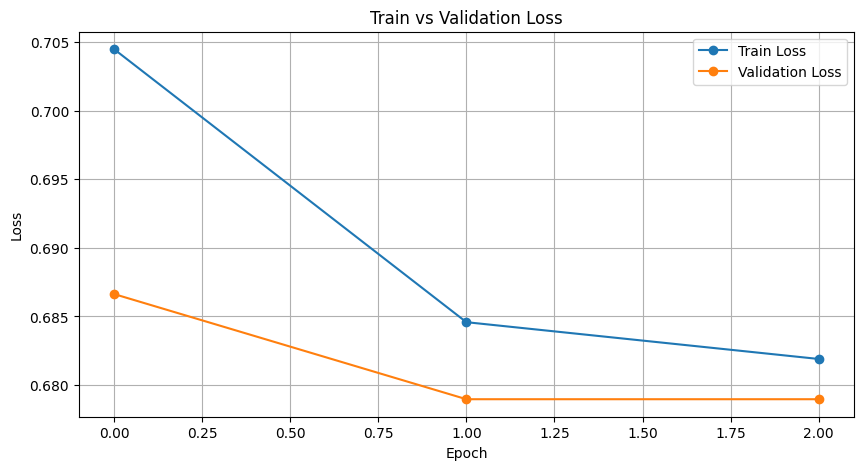

In [ ]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama accuracy grafiği
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('accuracy_plot.png')
plt.show()

# Eğitim ve doğrulama loss grafiği
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('loss_plot.png')
plt.show()